# Tracker data cleaning

In [177]:
import h5py
import numpy as np
import os
import glob
from datetime import datetime, timezone
import pandas as pd

In [178]:
pattern = "*_L2.h5"
folder_path = "/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/"
matching_files =sorted(glob.glob(os.path.join(folder_path, pattern)))
matching_files

['/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693125677_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693135845_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693148789_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693150591_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693152391_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693154191_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693155991_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693157791_L2.h5',
 '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/balloon_flight/CPU_data/230827/tracker/1693159591_L2.h5',
 

In [179]:
tfile = matching_files[0]
file = h5py.File(tfile,'r')

In [180]:
file.keys()

<KeysViewHDF5 ['Calibration', 'layer00', 'layer01', 'layer02', 'layer03', 'layer04', 'layer05', 'layer06', 'layer07', 'layer09']>

In [181]:
file['layer00/data'].keys()

<KeysViewHDF5 ['asic00', 'asic01', 'asic02', 'asic03', 'asic04', 'asic05', 'asic06', 'asic07', 'asic08', 'asic09', 'asic10', 'asic11', 'event_count', 'event_id', 'gps_pps_count', 'layer_number', 'live_time', 'packet_size', 'packet_tail', 'packet_type', 'pl_data_header', 'running_time', 'sync_index', 'system_time', 'tbd', 'time_since_last_pps_pulse', 'triggering_condition', 'vata_ro_ena']>

In [182]:
file['layer00/vdata'].keys()

<KeysViewHDF5 ['channel_cm_sub', 'channel_data', 'nrg', 'sig_arr']>

In [183]:
layer_list = ['layer00','layer01','layer02','layer03','layer04','layer05','layer06','layer07','layer08','layer09']

#### Testting groupby

In [184]:
ttime_file = file[f'layer00/data/system_time'][...]/1e9
tcount_file = file[f'layer00/data/event_count'][...]
tltime_file = file[f'layer00/data/live_time'][...]

In [186]:
import pandas as pd

# Assuming ttime, tcount, tltime are NumPy arrays
df = pd.DataFrame({'ttime': ttime_file, 'tcount': tcount_file, 'tltime': tltime_file})

df['ttime_seconds'] = (df['ttime']/60).astype(int)
df['tcount'] = df['tcount'].astype(int)
# df['count'] = df['tcount'].diff().fillna(0)  # Fill NaN with 0

# Group by ttime_seconds and calculate the average tcount for each group, dropping rows with NaN
grouped_data = df.groupby('ttime_seconds')['tcount'].mean().reset_index()

# Create a new DataFrame with the grouped data
new_df = pd.DataFrame(grouped_data, columns=['ttime_seconds', 'tcount'])
# grouped_data.info(), new_df.info()


<Axes: xlabel='ttime', ylabel='tcount'>

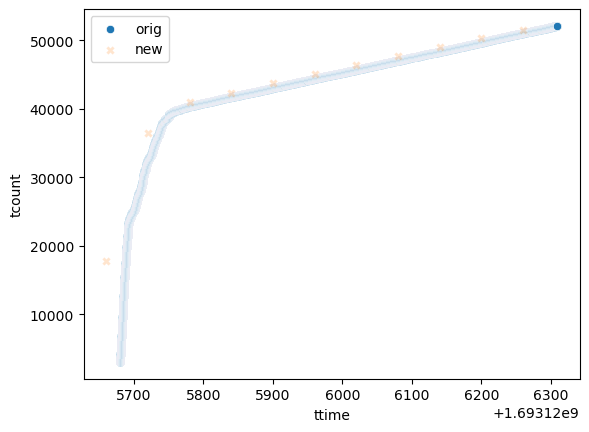

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.scatterplot(x=df['ttime'], y=df['tcount'],label='orig')
sns.scatterplot(x=new_df['ttime_seconds']*60,y=new_df['tcount'],label='new',alpha=0.2, marker='X')

In [ ]:
tdf['eventtime_seconds_grouped'] = tdf['eventtime_seconds'].dt.round('S')

# Group by 'eventtime_seconds_grouped' and calculate the average 'event_count'
average_count_df = tdf.groupby('eventtime_seconds_grouped')['event_count'].mean().reset_index()

# Print or use the new DataFrame

In [56]:
dfs =[]
for i in range(10):
    if layer_list[i] in file.keys():
        layer = layer_list[i]
        evt_time = file[f'{layer}/data/system_time'][...]/1e9
        evt_count = file[f'{layer}/data/event_count'][...]
        evt_livetime = file[f'{layer}/data/live_time'][...]/1e9

        # Creating a DataFrame for each layer with a common time column
        df = pd.DataFrame({'eventtime': evt_time, f'{layer}_event_count': evt_count, f'{layer}_livetime': evt_livetime})

        # Converting eventtime to seconds
        df['eventtime_seconds'] = pd.to_datetime(df['eventtime'], unit='s')

        # Append the result DataFrame to the list
        dfs.append(df)


In [52]:

grouped_df.reset_index(inplace=True)
# grouped_df['average_livetime'] = final_df.groupby('eventtime_seconds')['livetime'].mean()

In [53]:
grouped_df['diff_layer00ltime'] = grouped_df['layer00_livetime'].diff()

In [54]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47776 entries, 0 to 47775
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   eventtime_seconds    47776 non-null  datetime64[ns]
 1   layer00_event_count  47776 non-null  float64       
 2   layer01_event_count  47776 non-null  float64       
 3   layer02_event_count  47776 non-null  float64       
 4   layer03_event_count  47776 non-null  float64       
 5   layer04_event_count  47776 non-null  float64       
 6   layer05_event_count  47776 non-null  float64       
 7   layer06_event_count  47776 non-null  float64       
 8   layer07_event_count  47776 non-null  float64       
 9   layer09_event_count  47776 non-null  float64       
 10  layer00_livetime     47776 non-null  float64       
 11  layer01_livetime     47776 non-null  float64       
 12  layer02_livetime     47776 non-null  float64       
 13  layer03_livetime     47776 non-

In [55]:
grouped_df.head()

eventtime_seconds  layer00_event_count  layer01_event_count  \
0 2023-08-27 08:41:19.439985408               3080.0               3080.0   
1 2023-08-27 08:41:19.440477440               3081.0               3081.0   
2 2023-08-27 08:41:19.441299712               3082.0               3082.0   
3 2023-08-27 08:41:19.442054400               3083.0               3083.0   
4 2023-08-27 08:41:19.442514688               3084.0               3084.0   

   layer02_event_count  layer03_event_count  layer04_event_count  \
0               3080.0               3080.0               3080.0   
1               3081.0               3081.0               3081.0   
2               3082.0               3082.0               3082.0   
3               3083.0               3083.0               3083.0   
4               3084.0               3084.0               3084.0   

   layer05_event_count  layer06_event_count  layer07_event_count  \
0               3080.0               3080.0               3080.0   
1               3081.0               3081.0               3081.0   
2               3082.0               3082.0               3082.0   
3               3083.0               3083.0               3083.0   
4               3084.0               3084.0               3084.0   

   layer09_event_count  layer00_livetime  layer01_livetime  layer02_livetime  \
0               3080.0          7.722725          7.722725          7.722725   
1               3081.0          7.722748          7.722748          7.722748   
2               3082.0          7.722803          7.722803          7.722803   
3               3083.0          7.722851          7.722851          7.722851   
4               3084.0          7.722870          7.722870          7.722870   

   layer03_livetime  layer04_livetime  layer05_livetime  layer06_livetime  \
0          7.722725          7.722725          7.722725          7.722725   
1          7.722748          7.722748          7.722748          7.722748   
2          7.722803          7.722803          7.722803          7.722803   
3          7.722851          7.722851          7.722851          7.722851   
4          7.722870          7.722870          7.722870          7.722870   

   layer07_livetime  layer09_livetime  diff_layer00ltime  
0          7.722725          7.722725                NaN  
1          7.722748          7.722748           0.000022  
2          7.722803          7.722803           0.000055  
3          7.722851          7.722851           0.000048  
4          7.722870          7.722870           0.000019